# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [ ]:
# Import necessary libraries
import torch
from torch import nn # nn contains all pytorch building blocks for neural networking
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'1.13.1+cu116'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [ ]:
# Create the data parameters
weights = 0.3
bias = 0.9

# Make X and y using linear regression feature
start = 0
end = 1
step = 0.01
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weights * X + bias 


print(f"First 10 X & y samples:\nX: {X[:5]}\ny: {y[:5]}")
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")

First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120]])
Number of X samples: 100
Number of y samples: 100


In [ ]:
# Split the data into training and testing

#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

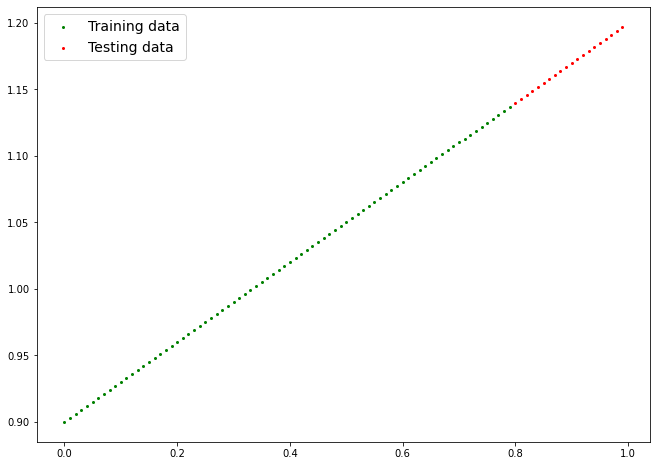

In [ ]:
# Plot the training and testing data 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(11, 8))

  # Plot training data in green
  plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")
  
  # Plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="y", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module
from torch import nn 
class linearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return weights * x + self.bias

In [ ]:
# Instantiate the model and put it to the target device
#Create a random seed 
torch.manual_seed(42)

#Create an instance of the model
model_0 = linearRegressionModel()

#Check out the  parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0.to(device)
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Create the loss function and optimizer
#Setup a loss function 
loss_fn = nn.L1Loss()
#Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [ ]:
# Training loop
# Train model for 300 epochs
torch.manual_seed(42)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Training

  # Put model in train mode
  # 1. Forward pass
  # 2. Calculate loss
  # 3. Zero gradients
  # 4. Backpropagation
  # 5. Step the optimizer

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = model_0(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(y_preds,y_test)
      # Print out what's happening
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().cpu().numpy())
      test_loss_values.append(test_loss.cpu().detach().numpy())
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.009 | Test loss: 0.001
Epoch: 20 | Train loss: 0.009 | Test loss: 0.001
Epoch: 40 | Train loss: 0.009 | Test loss: 0.001
Epoch: 60 | Train loss: 0.009 | Test loss: 0.001
Epoch: 80 | Train loss: 0.009 | Test loss: 0.001
Epoch: 100 | Train loss: 0.009 | Test loss: 0.001
Epoch: 120 | Train loss: 0.009 | Test loss: 0.001
Epoch: 140 | Train loss: 0.009 | Test loss: 0.001
Epoch: 160 | Train loss: 0.009 | Test loss: 0.001
Epoch: 180 | Train loss: 0.009 | Test loss: 0.001
Epoch: 200 | Train loss: 0.009 | Test loss: 0.001
Epoch: 220 | Train loss: 0.009 | Test loss: 0.001
Epoch: 240 | Train loss: 0.009 | Test loss: 0.001
Epoch: 260 | Train loss: 0.009 | Test loss: 0.001
Epoch: 280 | Train loss: 0.009 | Test loss: 0.001


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.1488],
        [1.1518],
        [1.1548],
        [1.1578],
        [1.1608],
        [1.1638],
        [1.1668],
        [1.1698],
        [1.1728],
        [1.1758],
        [1.1788],
        [1.1818],
        [1.1848],
        [1.1878],
        [1.1908],
        [1.1938],
        [1.1968],
        [1.1998],
        [1.2028],
        [1.2058]], device='cuda:0')

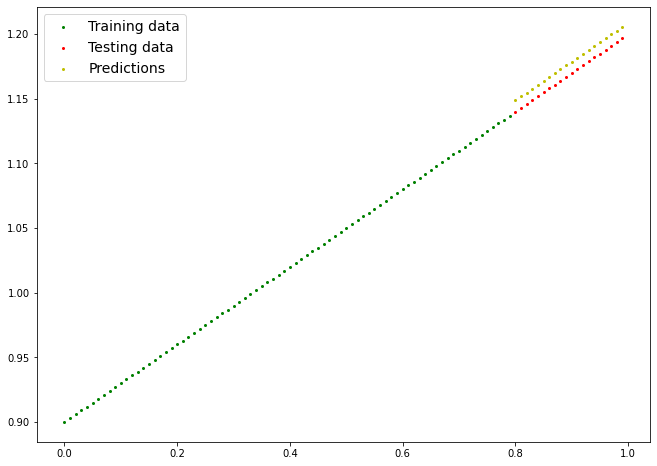

In [ ]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())

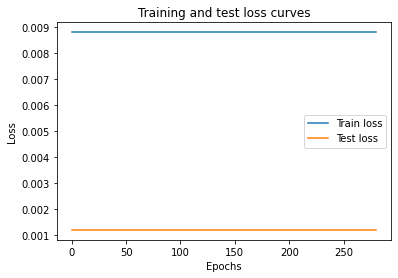

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_0 = linearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.to(device)
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
# Make predictions with loaded model and compare them to the previous
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')